In [31]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [32]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [33]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [34]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [35]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [36]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [37]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [38]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [39]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


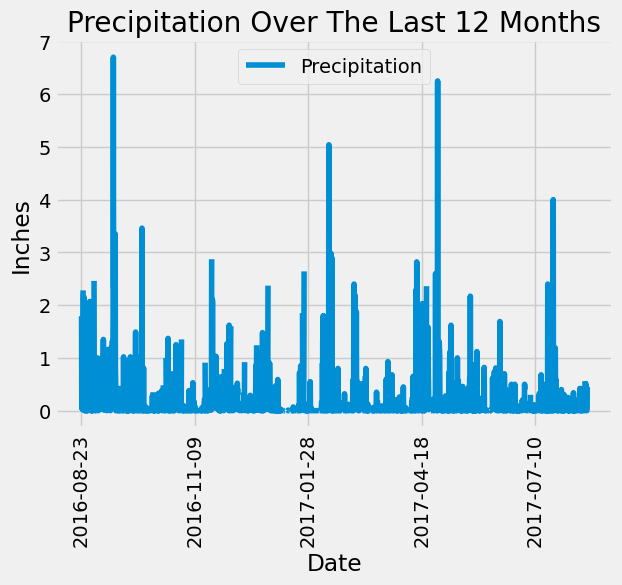

In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
start_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
 
# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= start_date).all()
    
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_data_df = pd.DataFrame(prcp_data, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
prcp_data_df_sorted = prcp_data_df.sort_values(by='Date')

prcp_data_df_sorted.plot(x='Date', y='Precipitation', rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation Over The Last 12 Months')
plt.show()

#Another way to do this...
#Use Pandas Plotting with Matplotlib to plot the data
# plt.figure(figsize=(10,6))
# plt.plot(prcp_data_df_sorted['Date'], prcp_data_df_sorted['Precipitation'], label='Precipitation')
# plt.ylabel('Inches')
# plt.xlabel('Date')
# plt.title('Precipitation Over the Last 12 Months')
# plt.xticks(rotation=45)
# plt.legend()
# plt.tight_layout()
# plt.show()

In [41]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = prcp_data_df_sorted['Precipitation'].describe()
summary_stats_df = pd.DataFrame(summary_stats)
summary_stats_df


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [42]:
# Design a query to calculate the total number of stations in the dataset
station_quantity = session.query(func.count(station.station)).scalar()
print(station_quantity)

9


In [43]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

station_counts = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

station_counts


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [44]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

min_max_avg_temp_most_active = session.query(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station=='USC00519281').all()

min_max_avg_temp_most_active



[('USC00519281', 54.0, 85.0, 71.66378066378067)]

2017-08-18
2016-08-18


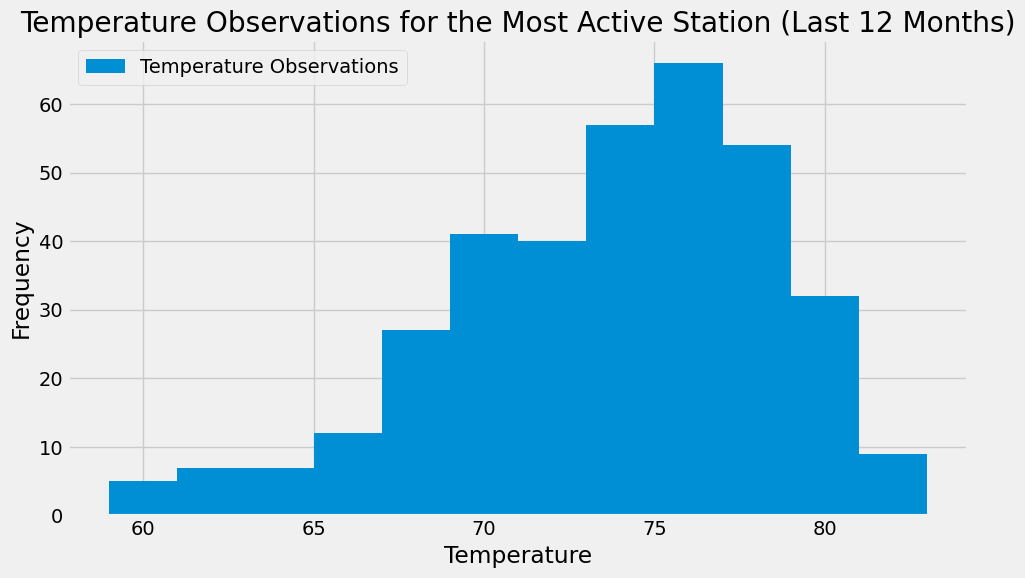

In [45]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#JT - using the max function to change things up a bit, we need to find the last date of the temperature data for this station, and then find the beginning date (365 days before).
last_date_most_active_station = session.query(func.max(measurement.date)).filter(measurement.station=='USC00519281').scalar()
print(last_date_most_active_station) #-- JT: to vistualize the last date of data for this station so we can incorporate in the beginning date calculation

beg_date_most_active_station = dt.date(2017, 8, 18) - dt.timedelta(days=365)
print(beg_date_most_active_station) #-- JT: checking to see it is exactly 12 months before.

tobs_data = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station=='USC00519281').\
    filter(measurement.date >= beg_date_most_active_station).all()

#JT: we filter by the station number so we only get results between the desired dates for the most active station id. Similar process to what we did for precipitation earlier in the challenge.
 
#JT: We convert this now into a DF so we can visualize/plot.
tobs_data_df = pd.DataFrame(tobs_data, columns=['Date', 'Temperature'])
tobs_data_df
              
# Plot the results as a histogram
plt.figure(figsize=(10, 6))
plt.hist(tobs_data_df['Temperature'], bins=12, label='Temperature Observations')

# Customize the plot
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Observations for the Most Active Station (Last 12 Months)')
plt.legend()
plt.tight_layout()
plt.show()

             


# Close Session

In [46]:
# Close Session
session.close()